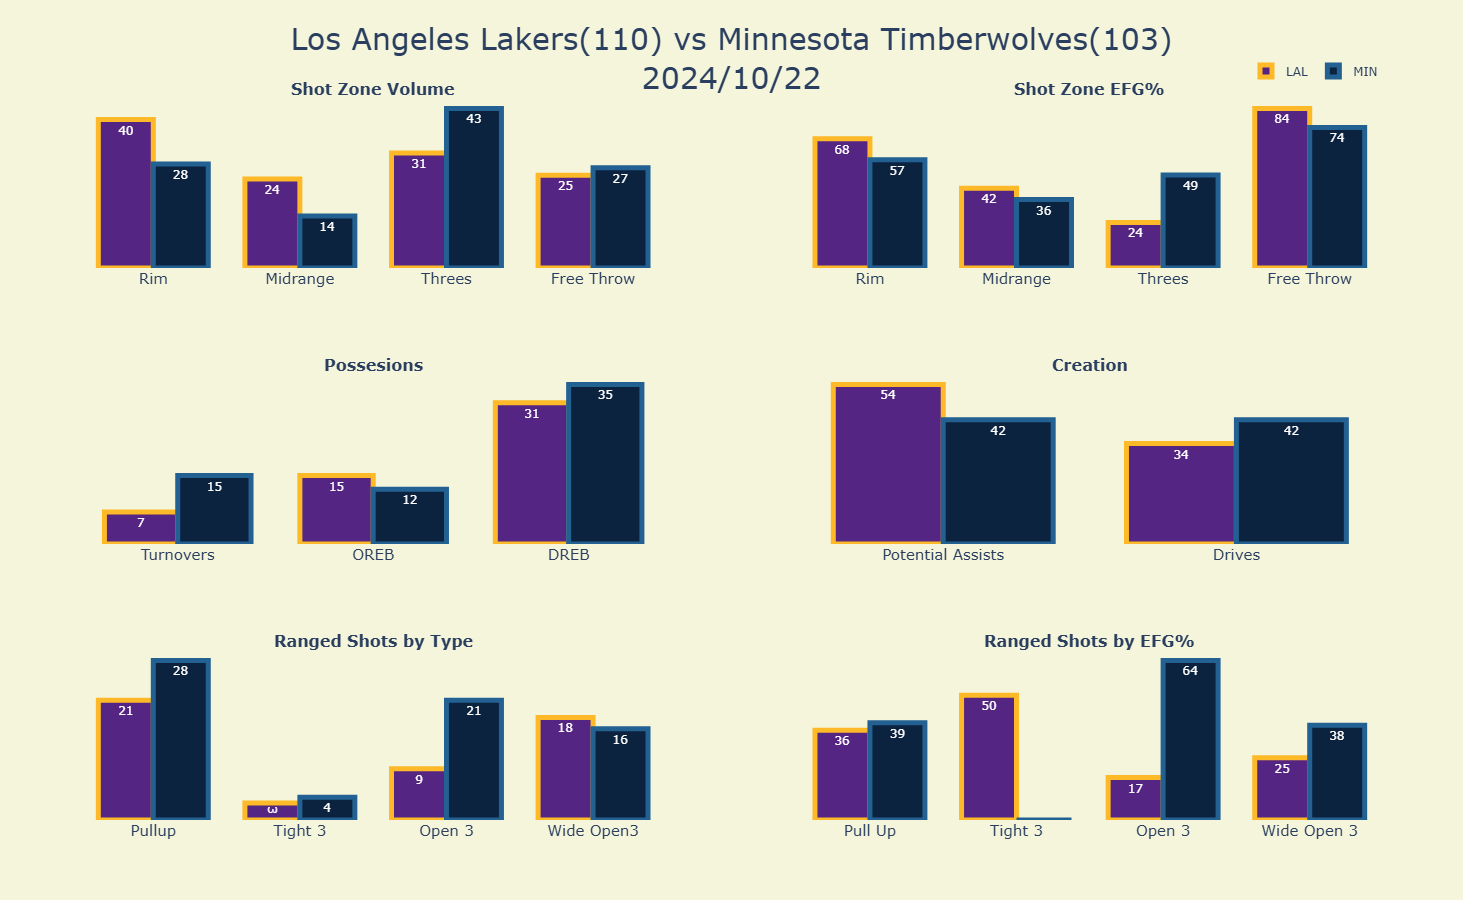

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

def get_colors():
    NBA_TEAM_COLORS = {
    # Eastern Conference
    ## Atlantic Division
        'BOS': '#007A33',  # Boston Celtics - Green
        'BKN': '#000000',  # Brooklyn Nets - Black
        'NYK': '#006BB6',  # New York Knicks - Blue
        'PHI': '#006BB6',  # Philadelphia 76ers - Blue
        'TOR': '#CE1141',  # Toronto Raptors - Red
    
        ## Central Division
        'CHI': '#CE1141',  # Chicago Bulls - Red
        'CLE': '#860038',  # Cleveland Cavaliers - Wine
        'DET': '#C8102E',  # Detroit Pistons - Red
        'IND': '#002D62',  # Indiana Pacers - Navy
        'MIL': '#00471B',  # Milwaukee Bucks - Green
    
        ## Southeast Division
        'ATL': '#E03A3E',  # Atlanta Hawks - Red
        'CHA': '#1D1160',  # Charlotte Hornets - Purple
        'MIA': '#98002E',  # Miami Heat - Red
        'ORL': '#0077C0',  # Orlando Magic - Blue
        'WAS': '#002B5C',  # Washington Wizards - Navy
    
        # Western Conference
        ## Northwest Division
        'DEN': '#0E2240',  # Denver Nuggets - Navy
        'MIN': '#0C2340',  # Minnesota Timberwolves - Navy
        'OKC': '#007AC1',  # Oklahoma City Thunder - Blue
        'POR': '#E03A3E',  # Portland Trail Blazers - Red
        'UTA': '#002B5C',  # Utah Jazz - Navy
    
        ## Pacific Division
        'GSW': '#1D428A',  # Golden State Warriors - Blue
        'LAC': '#C8102E',  # LA Clippers - Red
        'LAL': '#552583',  # Los Angeles Lakers - Purple
        'PHX': '#1D1160',  # Phoenix Suns - Purple
        'SAC': '#5A2D81',  # Sacramento Kings - Purple
    
        ## Southwest Division
        'DAL': '#00538C',  # Dallas Mavericks - Blue
        'HOU': '#CE1141',  # Houston Rockets - Red
        'MEM': '#5D76A9',  # Memphis Grizzlies - Blue
        'NOP': '#0C2340',  # New Orleans Pelicans - Navy
        'SAS': '#C4CED4'   # San Antonio Spurs - Silver
    }
    NBA_TEAM_SECONDARY_COLORS = {
        # Eastern Conference
        ## Atlantic Division
        'BOS': '#BA9653',  # Boston Celtics - Gold
        'BKN': '#FFFFFF',  # Brooklyn Nets - White
        'NYK': '#F58426',  # New York Knicks - Orange
        'PHI': '#ED174C',  # Philadelphia 76ers - Red
        'TOR': '#000000',  # Toronto Raptors - Black
    
        ## Central Division
        'CHI': '#000000',  # Chicago Bulls - Black
        'CLE': '#FDBB30',  # Cleveland Cavaliers - Gold
        'DET': '#1D42BA',  # Detroit Pistons - Blue
        'IND': '#FDBB30',  # Indiana Pacers - Gold
        'MIL': '#EEE1C6',  # Milwaukee Bucks - Cream
    
        ## Southeast Division
        'ATL': '#C1D32F',  # Atlanta Hawks - Volt Green
        'CHA': '#00788C',  # Charlotte Hornets - Teal
        'MIA': '#F9A01B',  # Miami Heat - Yellow
        'ORL': '#C4CED4',  # Orlando Magic - Silver
        'WAS': '#E31837',  # Washington Wizards - Red
    
        # Western Conference
        ## Northwest Division
        'DEN': '#FEC524',  # Denver Nuggets - Gold
        'MIN': '#236192',  # Minnesota Timberwolves - Blue
        'OKC': '#EF3B24',  # Oklahoma City Thunder - Orange
        'POR': '#000000',  # Portland Trail Blazers - Black
        'UTA': '#00A9E0',  # Utah Jazz - Light Blue
    
        ## Pacific Division
        'GSW': '#FFC72C',  # Golden State Warriors - Gold
        'LAC': '#1D428A',  # LA Clippers - Blue
        'LAL': '#FDB927',  # Los Angeles Lakers - Gold
        'PHX': '#E56020',  # Phoenix Suns - Orange
        'SAC': '#63727A',  # Sacramento Kings - Silver
    
        ## Southwest Division
        'DAL': '#002B5E',  # Dallas Mavericks - Navy
        'HOU': '#000000',  # Houston Rockets - Black
        'MEM': '#12173F',  # Memphis Grizzlies - Navy
        'NOP': '#C8102E',  # New Orleans Pelicans - Red
        'SAS': '#000000'   # San Antonio Spurs - Black
    }
    return NBA_TEAM_COLORS,NBA_TEAM_SECONDARY_COLORS




def full_names(team):
    # Dictionary mapping abbreviations to full NBA team names
    team_map = {
        'ATL': 'Atlanta Hawks',
        'BOS': 'Boston Celtics',
        'BKN': 'Brooklyn Nets',
        'CHA': 'Charlotte Hornets',
        'CHI': 'Chicago Bulls',
        'CLE': 'Cleveland Cavaliers',
        'DAL': 'Dallas Mavericks',
        'DEN': 'Denver Nuggets',
        'DET': 'Detroit Pistons',
        'GSW': 'Golden State Warriors',
        'HOU': 'Houston Rockets',
        'IND': 'Indiana Pacers',
        'LAC': 'Los Angeles Clippers',
        'LAL': 'Los Angeles Lakers',
        'MEM': 'Memphis Grizzlies',
        'MIA': 'Miami Heat',
        'MIL': 'Milwaukee Bucks',
        'MIN': 'Minnesota Timberwolves',
        'NOP': 'New Orleans Pelicans',
        'NYK': 'New York Knicks',
        'OKC': 'Oklahoma City Thunder',
        'ORL': 'Orlando Magic',
        'PHI': 'Philadelphia 76ers',
        'PHX': 'Phoenix Suns',
        'POR': 'Portland Trail Blazers',
        'SAC': 'Sacramento Kings',
        'SAS': 'San Antonio Spurs',
        'TOR': 'Toronto Raptors',
        'UTA': 'Utah Jazz',
        'WAS': 'Washington Wizards'
    }
    return team_map[team]


def create_team_comparison(game_id,year):
    

    df =pd.read_csv('https://raw.githubusercontent.com/gabriel1200/player_sheets/refs/heads/master/game_report/'+str(year)+'/'+str(game_id)+'.csv')

    names=df['TEAM_ABBREVIATION'].unique().tolist()
    team1=names[0]
    team2=names[1]
    sumframe = df.groupby(['TEAM_ID', 'TEAM_ABBREVIATION', 'date']).sum(numeric_only=True)[
        ['very_tight_FG3A', 'wide_open_FG3A', 'open_FG3A', 'tight_FG3A', 'very_tight_FG3M', 'wide_open_FG3M', 
         'open_FG3M', 'tight_FG3M', 'CATCH_SHOOT_FGA', 'FGA', 'FTA', 'PULL_UP_FGA', 'PULL_UP_FGM', 'PULL_UP_FG3M','POINTS', 'FGA_15_19','FGA_20_24','FGA_5_9','FGA_10_14', 'FGA_LT_5',
         'FGA_25_29','FGA_30_34','FGA_35_39','FGA_40_PLUS','FGM_15_19', 'FGM_20_24', 'FGM_5_9', 'FGM_10_14', 'FGM_LT_5',
        'FGM_25_29', 'FGM_30_34', 'FGM_35_39', 'FGM_40_PLUS','FTM',
         'DRIVES', 'OREB', 'DREB', 'POTENTIAL_AST', 'TOV', 'RA_FGA', 'FRONT_CT_TOUCHES']].reset_index()

    main_colors, secondary_colors = get_colors()


# Grouping columns into rim, midrange, and threes for attempts
    sumframe['Rim_Attempts'] = sumframe['FGA_LT_5']
    
    sumframe['Midrange_Attempts'] = sumframe[['FGA_5_9', 'FGA_10_14', 'FGA_15_19']].sum(axis=1)
    
    sumframe['Threes_Attempts'] = sumframe[['FGA_20_24', 'FGA_25_29', 'FGA_30_34', 'FGA_35_39', 'FGA_40_PLUS']].sum(axis=1)
    sumframe['Rim'] = sumframe['FGM_LT_5']
    
    sumframe['Midrange'] = sumframe[['FGM_5_9', 'FGM_10_14', 'FGM_15_19']].sum(axis=1)
    
    sumframe['Threes'] = sumframe[['FGM_20_24', 'FGM_25_29', 'FGM_30_34', 'FGM_35_39', 'FGM_40_PLUS']].sum(axis=1)
    sumframe['PullUp_eFG%'] = ((sumframe['PULL_UP_FGM'] + 0.5 * sumframe['PULL_UP_FG3M']) / sumframe['PULL_UP_FGA']) * 100  # Convert to percentage if desired
    sumframe['rim%']=100* sumframe['Rim']/sumframe['Rim_Attempts']
    sumframe['mid%']=100*sumframe['Midrange']/sumframe['Midrange_Attempts']
    sumframe['three%']=100* 1.5*sumframe['Threes']/sumframe['Threes_Attempts']
    sumframe['ft%']=100*sumframe['FTM']/sumframe['FTA']

    # Calculate FG3% for each category
    sumframe["very_tight_fg3%"] = 1.5*100 * sumframe['very_tight_FG3M'] / sumframe['very_tight_FG3A']
    sumframe["wide_open_fg3%"] = 1.5*100 * sumframe['wide_open_FG3M'] / sumframe['wide_open_FG3A']
    sumframe["open_fg3%"] = 1.5*100 * sumframe['open_FG3M'] / sumframe['open_FG3A']
    sumframe["pullup_fg%"]= 100* sumframe["PULL_UP_FGM"]/sumframe["PULL_UP_FGA"]
    sumframe["tight_fg3%"] = 1.5*100 * sumframe['tight_FG3M'] / sumframe['tight_FG3A']

    team1color = main_colors[team1]
    team2color = main_colors[team2]
    team1second_color = secondary_colors[team1]
    team2second_color = secondary_colors[team2]

    selected_teams = [team1, team2]
    sumframe = sumframe[sumframe.TEAM_ABBREVIATION.isin(selected_teams)]


    df1 = sumframe[sumframe.TEAM_ABBREVIATION == team1]
    df2 = sumframe[sumframe.TEAM_ABBREVIATION == team2]
    team1_points= int(df1['POINTS'].sum())
    team2_points= int(df2['POINTS'].sum())
    team1_name = df1['TEAM_ABBREVIATION'].iloc[0]
    team2_name = df2['TEAM_ABBREVIATION'].iloc[0]
    date = df2['date'].iloc[0]

    # Create figure with secondary y-axis
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=("<b>Shot Zone Volume<b>", "<b>Shot Zone EFG%<b>", "<b>Possesions<b>","<b>Creation<b>","<b>Ranged Shots by Type<b>", "<b>Ranged Shots by EFG%<b>"),
        vertical_spacing=0.15,
        horizontal_spacing=0.1
    )

    # 1. 3PT Shot Distribution (top left)
    shot_types = ['PULL_UP_FGA', 'tight_FG3A', 'open_FG3A', 'wide_open_FG3A']
    team1_shots = [int(round(df1[col].iloc[0],0)) for col in shot_types]
    team2_shots = [int(round(df2[col].iloc[0],0))  for col in shot_types]

    fig.add_trace(
        go.Bar(
            name=team1_name, 
            x=['Pullup', 'Tight 3', 'Open 3', 'Wide Open3'], 
            y=team1_shots, 
            text=team1_shots,
            marker=dict(
                color=team1color, 
                line=dict(
                    color=team1second_color,  # Outline color
                    width=5                  # Outline width
                )
            )
        ),
        row=3, col=1
    )

    fig.add_trace(
        go.Bar(
            name=team2_name, 
            x=['Pullup', 'Tight 3', 'Open 3', 'Wide Open3'], 
            y=team2_shots, 
            text=team2_shots,
            marker=dict(
                color=team2color, 
                line=dict(
                    color=team2second_color,  # Outline color
                    width=5                  # Outline width
                )
            )
        ),
        row=3, col=1
    )

    # 2. Shot Making (top right)
    make_types = ['PullUp_eFG%', 'tight_fg3%', 'open_fg3%', 'wide_open_fg3%']
    team1_makes = [int(round(df1[col].iloc[0],0)) for col in make_types]
    team2_makes = [int(round(df2[col].iloc[0],0))  for col in make_types]

    fig.add_trace(
        go.Bar(
            name=team1_name, 
            x=['Pull Up', 'Tight 3', 'Open 3', 'Wide Open 3'], 
            y=team1_makes, 
            text=team1_makes,
            marker=dict(
                color=team1color, 
                line=dict(
                    color=team1second_color,  # Outline color
                    width=5                  # Outline width
                )
            ), 
            showlegend=False
        ),
        row=3, col=2
    )

    fig.add_trace(
        go.Bar(
            name=team2_name, 
            x=['Pull Up', 'Tight 3', 'Open 3', 'Wide Open 3'], 
            y=team2_makes, 
            text=team2_makes,
            marker=dict(
                color=team2color, 
                line=dict(
                    color=team2second_color,  # Outline color
                    width=5                  # Outline width
                )
            ), 
            showlegend=False
        ),
        row=3, col=2
    )

    # 3. Offensive Creation (bottom left)
    creation_metrics = ['TOV', 'OREB','DREB']
    team1_creation = [int(round(df1[col].iloc[0],0)) for col in creation_metrics]
    team2_creation = [int(round(df2[col].iloc[0],0))  for col in creation_metrics]

    fig.add_trace(
        go.Bar(
            name=team1_name, 
            x=['Turnovers', 'OREB','DREB'], 
            y=team1_creation, 
            text=team1_creation,
            marker=dict(
                color=team1color, 
                line=dict(
                    color=team1second_color,  # Outline color
                    width=5                  # Outline width
                )
            ), 
            showlegend=False
        ),
        row=2, col=1
    )

    fig.add_trace(
        go.Bar(
            name=team2_name, 
            x=['Turnovers', 'OREB','DREB'], 
            y=team2_creation, 
            text=team2_creation,
            marker=dict(
                color=team2color, 
                line=dict(
                    color=team2second_color,  # Outline color
                    width=5                  # Outline width
                )
            ), 
            showlegend=False
        ),
        row=2, col=1
    )

    # 4. Shot Selection (bottom right)
    # 5. Additional shot selection (bottom left)
    selection_metrics = ['POTENTIAL_AST', 'DRIVES']
    team1_selection = [int(round(df1[col].iloc[0],0)) for col in selection_metrics]
    team2_selection = [int(round(df2[col].iloc[0],0))  for col in selection_metrics]

    fig.add_trace(
        go.Bar(
            name=team1_name, 
            x=['Potential Assists', 'Drives'], 
            y=team1_selection, 
            text=team1_selection,
            marker=dict(
                color=team1color, 
                line=dict(
                    color=team1second_color,  # Outline color
                    width=5                  # Outline width
                )
            ), 
            showlegend=False
        ),
        row=2, col=2
    )

    fig.add_trace(
        go.Bar(
            name=team2_name, 
            x=['Potential Assists', 'Drives'], 
            y=team2_selection, 
            text=team2_selection,
            marker=dict(
                color=team2color, 
                line=dict(
                    color=team2second_color,  # Outline color
                    width=5                  # Outline width
                )
            ), 
            showlegend=False
        ),
        row=2, col=2
    )
    selection_metrics = ['Rim_Attempts','Midrange_Attempts','Threes_Attempts','FTA']
    team1_selection = [int(round(round(df1[col].iloc[0],0),0)) for col in selection_metrics]
    team2_selection = [int(round(round(df2[col].iloc[0],0) ,0))  for col in selection_metrics]

    fig.add_trace(
        go.Bar(
            name=team1_name, 
            x=['Rim','Midrange','Threes','Free Throw'], 
            y=team1_selection, 
            text=team1_selection,
            marker=dict(
                color=team1color, 
                line=dict(
                    color=team1second_color,  # Outline color
                    width=5                  # Outline width
                )
            ), 
            showlegend=False
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Bar(
            name=team2_name, 
            x=['Rim','Midrange','Threes','Free Throw'], 
            y=team2_selection, 
            text=team2_selection,
            marker=dict(
                color=team2color, 
                line=dict(
                    color=team2second_color,  # Outline color
                    width=5                  # Outline width
                )
            ), 
            showlegend=False
        ),
        row=1, col=1
    )

    selection_metrics = ['rim%','mid%','three%','ft%']
    team1_selection = [int(round(df1[col].iloc[0],0)) for col in selection_metrics]
    team2_selection = [int(round(df2[col].iloc[0],0) ) for col in selection_metrics]

    fig.add_trace(
        go.Bar(
            name=team1_name, 
            x=['Rim','Midrange','Threes','Free Throw'], 
            y=team1_selection, 
            text=team1_selection,
            marker=dict(
                color=team1color, 
                line=dict(
                    color=team1second_color,  # Outline color
                    width=5                  # Outline width
                )
            ), 
            showlegend=False
        ),
        row=1, col=2
    )

    fig.add_trace(
        go.Bar(
            name=team2_name, 
            x=['Rim','Midrange','Threes','Free Throw'], 
            y=team2_selection, 
            text=team2_selection, 
            marker=dict(
                color=team2color, 
                line=dict(
                    color=team2second_color,  # Outline color
                    width=5                  # Outline width
                )
            ), 
            showlegend=False
        ),
        row=1, col=2
    )

    # Update

    # Update layout
    fig.update_layout(
        height=900,
        width=1350,
        title_text=full_names(team1)+"("+str(team1_points)+") vs "+full_names(team2) +"("+str(team2_points)+")<br>"+str(date)[0:4]+ "/"+str(date)[4:6] + "/"+str(date)[6:],
        title_x=.5,
        title_font_size=30,
        barmode='group',
          bargap=0.25, 

        paper_bgcolor='#F5F5DC',
        plot_bgcolor='#F5F5DC',
    
        showlegend=True,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )
    

    fig.update_yaxes(title_text="Shot Attempts", row=1, col=1)
    fig.update_yaxes(title_text="eFG%", row=1, col=2)
    fig.update_yaxes(title_text="Total", row=2, col=1)
    fig.update_yaxes(title_text="Total", row=2, col=2)
    fig.update_yaxes(title_text="Shot Attempts", row=3, col=1)
    fig.update_yaxes(title_text="eFG%", row=3, col=2)
    fig.update_xaxes(tickfont=dict(size=15))
    fig.update_yaxes(visible=False)


    return fig

team1='CLE'
team2='TOR'

year=2025
game_id=22400062
fig = create_team_comparison(game_id,year)
fig.show()